<a href="https://colab.research.google.com/github/tayfununal/hello-world/blob/master/TensorFlow_Ders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model



In [ ]:
# Print the model summary



***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [4]:
# Build the Sequential convolutional neural network model

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D((3,3)),
                    Flatten(),
                    Dense(10, activation='softmax')
])

In [5]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [11]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=[acc,mae]
              )

In [14]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [15]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [16]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [17]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [18]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [19]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

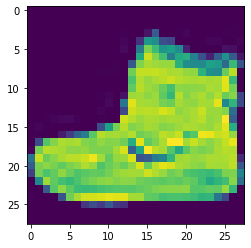

label: Ankle boot


In [20]:
# Display one of the images

i =0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [ ]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 11s - loss: 0.5490 - sparse_categorical_accuracy: 0.8077 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 11s - loss: 0.3670 - sparse_categorical_accuracy: 0.8697 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 11s - loss: 0.3281 - sparse_categorical_accuracy: 0.8837 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 11s - loss: 0.3104 - sparse_categorical_accuracy: 0.8892 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 11s - loss: 0.2962 - sparse_categorical_accuracy: 0.8940 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 11s - loss: 0.2857 - sparse_categorical_accuracy: 0.8966 - mean_absolute_error: 4.4200
Epoch 7/8


#### Plot training history

In [38]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,2.341024,0.760467,4.419999
1,0.448948,0.842133,4.420001
2,0.400985,0.854783,4.420000
3,0.382136,0.861550,4.420000
4,0.369536,0.864583,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

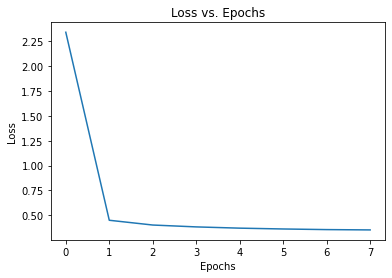

In [39]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model



#### Make predictions from the model

In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

